In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Downloads/student/house_prices.csv")
print(df.head())             # This will give the first 5 rows from the dataset.
print(df.isnull().sum())            # This is give the total null values present in the file.
print(df.info())             # This will give the data types and not null counts from the file.
print(df.describe())          # this will describe the whole table like count std(standard deviation),min,max.

   Size Location  Number of Rooms   Price
0  3674    Urban                3  597468
1  1360    Urban                5  240783
2  1794    Urban                2  274071
3  1630    Rural                3  267990
4  1595    Rural                5  271240
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             400 non-null    int64 
 1   Location         400 non-null    object
 2   Number of Rooms  400 non-null    int64 
 3   Price            400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
              Size  Number of Rooms          Price
count   400.000000       400.000000     400.000000
mean   2330.190000         2.950000  379294.747500
std     990.555786         1.432701  149894.611093
min     501.00000

In [14]:
df.fillna(df.mean(numeric_only=True),inplace = True)
df.fillna("Unknown",inplace = True)

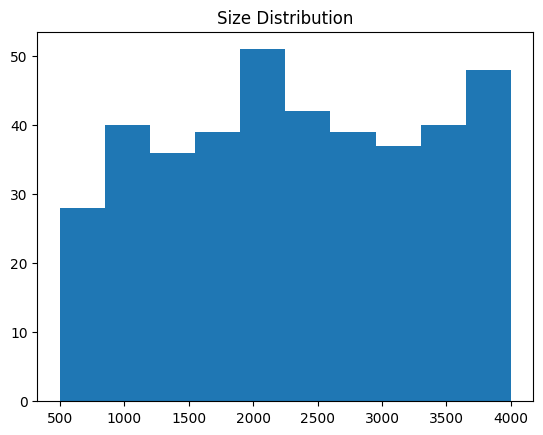

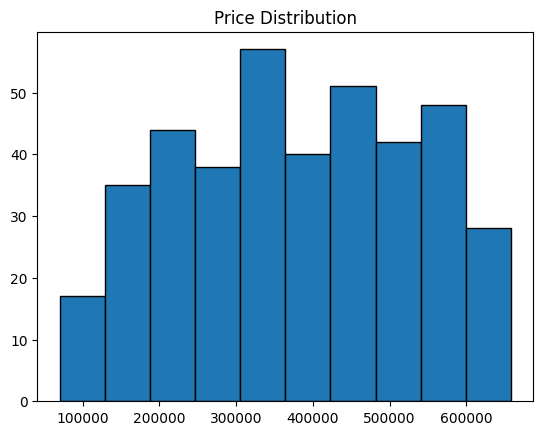

In [15]:
# Here i have represnt the Size distribution and Price distribution in Histogram with the matplot library.
plt.hist(df["Size"])
plt.title("Size Distribution")
plt.show()

plt.hist(df["Price"],edgecolor = "Black")
plt.title("Price Distribution")
plt.show()

In [22]:
pd1 = pd.get_dummies(df,columns=["Location"],drop_first = True)   # This will encode the the location data into numbers as the predective model only works on the numbers.
print(pd1)                         # drop_first=True, is used to avoid dummy variable trap.

     Size  Number of Rooms   Price  Location_Suburban  Location_Urban
0    3674                3  597468              False            True
1    1360                5  240783              False            True
2    1794                2  274071              False            True
3    1630                3  267990              False           False
4    1595                5  271240              False           False
..    ...              ...     ...                ...             ...
395   725                2  121463              False            True
396  3848                2  579919              False            True
397  1297                3  227440              False            True
398  2831                2  436350              False            True
399  3426                3  560409               True           False

[400 rows x 5 columns]


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x =pd1.drop("Price",axis = 1)            # This will drop the price column as we want the prediction of price,axis =1 means column.
y = pd1["Price"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)            
print(x_scaled)

[[ 1.35832119  0.03494283 -0.68599434  1.25064086]
 [-0.98066664  1.43265594 -0.68599434  1.25064086]
 [-0.54198007 -0.66391373 -0.68599434  1.25064086]
 ...
 [-1.04434695  0.03494283 -0.68599434  1.25064086]
 [ 0.50621802 -0.66391373 -0.68599434  1.25064086]
 [ 1.10764315  0.03494283  1.45773797 -0.79959006]]


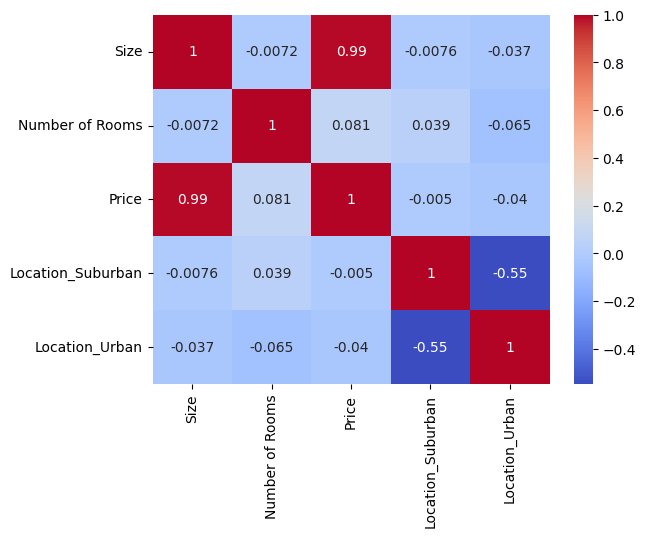

In [34]:
sns.heatmap(pd1.corr(numeric_only=True), annot=True, cmap="coolwarm")   # this will generate the heatmap of correlation between all the numerical values present there
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

# Splitting the data: 80% for training the model and 20% for testing it.
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)
# random_state ensures the same split every time for reproducibility.



model = LinearRegression()   # Creating the regression model object
model.fit(x_train, y_train)  
# This trains the model using training data.
# The model learns the relationship between features (Size, Rooms, Location) and target (Price).
y_pred = model.predict(X_test)       ## The trained model predicts house prices for the unseen test data.
print(y_pred)

[449775.62390956 214929.99633148 235239.43951758 590419.20198313
 384883.9071464  487870.07962228 300702.71528527 264380.97960033
 221472.77179572 145067.54922147 290600.58493967 554933.00548932
 290839.820889   639819.50492192 429477.01013494 115298.96297719
 543897.9715769  174519.75353645 331247.50782682 533856.89553779
 577978.35975471 525720.03712367 487572.34522367 229472.87035061
 582367.15712061 599312.35318626 405140.11414523 590419.20198313
 350036.85220316 236548.33889296 130409.11873102 487079.50306416
 531414.72257268 470324.303045   339453.5435541  481113.54886645
 301337.88445349 360452.65807326 180654.50039276 589131.50599566
 229599.25623342 427962.17358718 434903.43812751 278527.92040058
 239658.97980322 194584.69851122 534212.97783808 338304.32883848
 610177.30456044 239508.83467532 190188.08302611 258353.97109614
 175495.06387907 555606.73569648 296949.08708758 508550.25635494
 212280.62021642 198993.40938538 622142.23074742 239680.18319112
 352687.51819786 385634.6

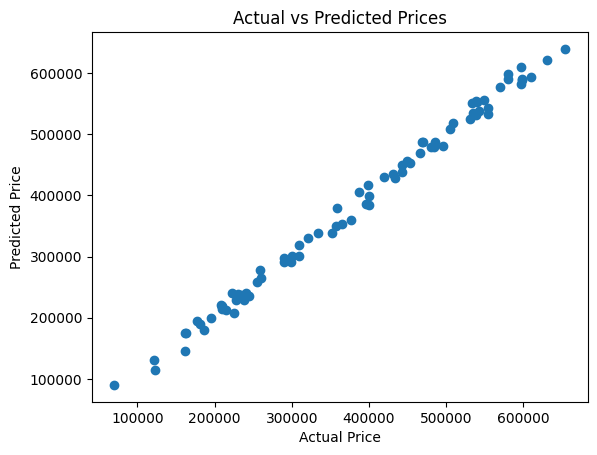

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [38]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"]) # This shows how much each feature affects the house price.
print(coeff_df)


                     Coefficient
Size               148541.099992
Number of Rooms     13135.823207
Location_Suburban    -261.566983
Location_Urban        256.007728
